This notebook is part of an Applied Process Mining module. The collection of notebooks is a *living document* and subject to change. 

# Lecture 1 - 'Event Logs and Process Visualization' (R / bupaR)

## Setup

<img src="http://bupar.net/images/logo_text.PNG" alt="bupaR" style="width: 200px;"/>

In this notebook, we are going to need the `tidyverse` and the `bupaR` packages. If you run this notebook in the recommended Docker environment then there is no need to install any packages. Otherwise, you may need to install the requirements that are commented out below:

In [1]:
## Perform the commented out commands below in a separate R session
# install.packages("tidyverse")
# install.packages("bupaR")
# install.packages("processmapR")
# install.packages("processanimateR")

We are setting up some convenicence options for the notebook and import dependencies:

In [1]:
# for larger and readable plots
options(jupyter.plot_scale=1.25)

In [2]:
# the initial execution of these may give you warnings that we can safely ignore
suppressPackageStartupMessages (library(tidyverse)) 
suppressPackageStartupMessages (library(bupaR))
library(processmapR)
library(processanimateR)

## Event Logs

This part introduces event logs and their unique properties that provide the basis for any Process Mining method. Together with `bupaR` several event logs are distributed that can be loaded without further processing. 
In this lecture we are going to make use of the following datasets:

* Patients, a synthetically generated example event log in a hospital setting.
* Sepsis, a real-life event log taken from a Dutch hospital. The event log is publicly available here: https://doi.org/10.4121/uuid:915d2bfb-7e84-49ad-a286-dc35f063a460 and has been used in many Process Mining related publications.

### Exploring Event Data

Let us first explore the event data without any prior knowledge about event log structure or properties. We convert the `patients` event log below to a standard `tibble` (https://tibble.tidyverse.org/) and inspect the first rows.

In [3]:
patients %>%
    as_tibble() %>%
    head()

handling,patient,employee,handling_id,registration_type,time,.order
<fct>,<chr>,<fct>,<chr>,<fct>,<dttm>,<int>
Registration,1,r1,1,start,2017-01-02 11:41:53,1
Registration,2,r1,2,start,2017-01-02 11:41:53,2
Registration,3,r1,3,start,2017-01-04 01:34:05,3
Registration,4,r1,4,start,2017-01-04 01:34:04,4
Registration,5,r1,5,start,2017-01-04 16:07:47,5
Registration,6,r1,6,start,2017-01-04 16:07:47,6


The most important ingredient of an event log is the timestamps column `time`. This allows us to establish a sequence of events.

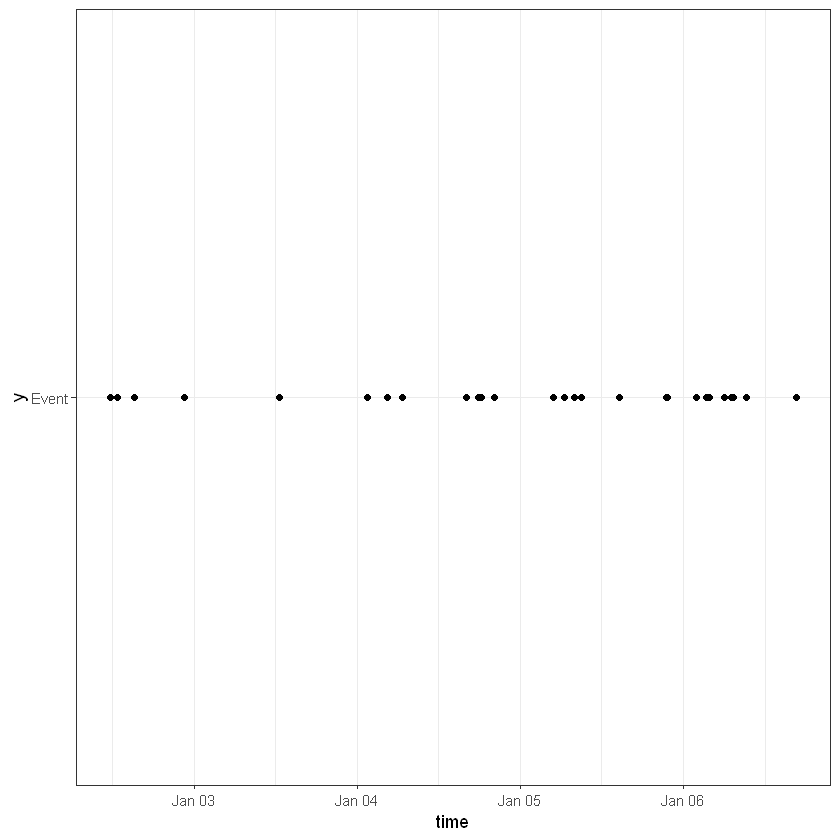

In [6]:
patients %>% 
  filter(time < '2017-01-7') %>% 
  ggplot(aes(time, "Event")) + 
  geom_point() + 
  theme_bw()

We also need to have information on the kind of actions or activities performed:

In [7]:
patients %>%
    as_tibble() %>% 
    distinct(handling)

handling
<fct>
Registration
Triage and Assessment
Blood test
MRI SCAN
X-Ray
Discuss Results
Check-out


Let us have a look at what other data is available:

In [8]:
patients %>%
    as_tibble() %>% 
    distinct(patient)  %>% 
    head()

patient
<chr>
1
2
3
4
5
6


Maybe the patient identifier could be a good candidate for defining a process case. When counting the events that occurred per individual patient it seems that there is a similar number of events for each patient, which is generally a good indicator for a process case identifier:

In [10]:
patients %>%
    as_tibble() s%>% 
    count(patient) %>% 
    head()

patient,n
<chr>,<int>
1,12
10,10
100,10
101,10
102,10
103,12


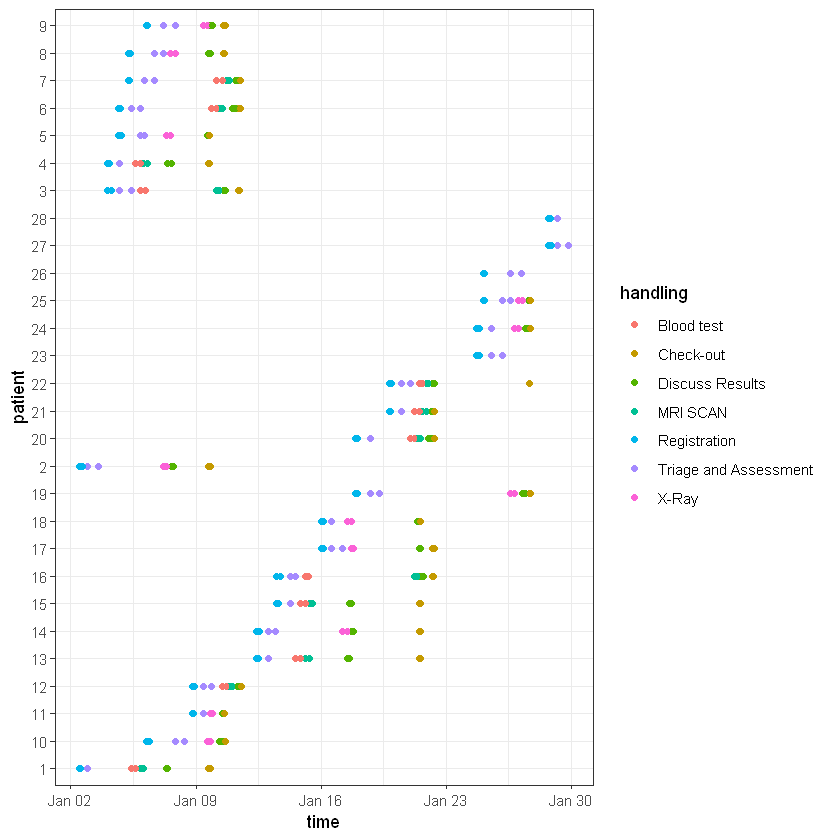

In [11]:
patients %>% 
  filter(time < '2017-01-31') %>% 
  ggplot(aes(time, patient, color = handling)) + 
  geom_point() + 
  theme_bw()

In [ ]:
patients %>% 
  as_tibble() %>% 
  arrange(patient, time) %>% 
  head()

### Further resources

* [XES Standard](http://xes-standard.org/)
* [Creating event logs from CSV files in bupaR](http://bupar.net/creating_eventlogs.html)
* [Changing the case, activity notiions in bupaR](http://bupar.net/mapping.html)

### Reflection Questions

* What could be the reason a column `.order` is included in this dataset?
* How could the column `employee` be used?
* What is the use of the column `handling_id` and in which situation is it required?

## Basic Process Visualization

### Set of Traces

In [ ]:
patients %>% 
  trace_explorer(coverage = 1.0, .abbreviate = T) # abbreviated here due to poor Jupyter notebook output scaling

### Dotted Chart

In [ ]:
patients %>%
    filter(time < '2017-01-31') %>% 
    dotted_chart(add_end_events = T)

In [ ]:
patients %>%    
    dotted_chart("relative", add_end_events = T)

We can also use `plotly` to get an interactive visualization:

In [ ]:
patients %>%    
    plotly_dotted_chart("relative", add_end_events = T)

In [ ]:
sepsis %>% 
    dotted_chart("relative_day",
                 sort = "start_day", 
                 units = "hours")

Check out other process visualization options using bupaR:

* [Further Dotted Charts](http://bupar.net/dotted_chart.html)
* [Exploring Time, Resources, Structuredness](http://bupar.net/exploring.html)

## Process Map Visualization

In [ ]:
patients %>% 
    precedence_matrix() %>% 
    plot()

In [ ]:
patients %>% 
    process_map()

In [ ]:
patients %>% 
    process_map(type = performance(units = "hours"))

#### Challenge 1
Use some other attribute to be shown in the `patients` dataset.

In [ ]:
#patients %>% 
#    process_map(type = custom(...))

In [ ]:
patients %>% 
    animate_process(mode = "relative")

#### Challenge 2
Reproduce the example shown on the lecture slides by animating some other attribute from the `traffic_fines` dataset.

In [ ]:
traffic_fines %>% 
  head()

In [ ]:
traffic_fines %>% 
    # WARNING: don't animate the full log in Jupyter (at least not on Firefox - it will really slow down your browser the library does not scale well)
    bupaR::sample_n(1000) %>%
    edeaR::filter_trace_frequency(percentage=0.95) %>%
    animate_process(mode = "relative")

In [ ]:
# traffic_fines %>% 

## Real-life Processes

In [ ]:
sepsis %>% 
  precedence_matrix() %>% 
  plot()

# Exercises - 1st Hands-on Session

In the first hands-on session, you are going to explore a real-life dataset (see the Assignment notebook) and apply what was presented in the lecture about event logs and basic process mining visualizations. The objective is to explore your dataset and as an event log and with the learned process mining visualizations in mind.

* Analyse basic properties of the the process (business process or other process) that has generated it. 
    * What are possible case notions / what is the or what are the case identifiers?
    * What are the activities? Are all activities on the same abstraction level? Can activities be derived from other data?
    * Can activities or actions be derived from other (non-activity) data?
* Discovery a map of the process (or a sub-process) behind it.
    * Are there multiple processes that can be discovered?
    * What is the effect of taking a subset of the data?

*Hint*: You may use/copy the code from this notebook to have a starting point. 